Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Steven Raaijmakers - 10804242
Nizar El Mahjoubi - 10642021

-------------
# Exercise 1
# (a)
Let $Q$ be a real, square orthogonal matrix. Show that all eigenvalues of $Q$ satisfy $|\lambda |=1$.

We have: $Qx$ = $\lambda x$ 

from this: $||Qx||^2$ = $||\lambda x||^2$ = $|\lambda|^2 ||x||^2$

Because Q is a real, square and orthogonal matrix, it follows that:

$||Qx||^2$ = $(Qx)^T(Qx)$
           = $x^T Q^TQx$
           = $x^T x$ = $||x||^2$

Replacing what we found in what we showed earlier:  

$||x||^2$ =  $|\lambda|^2 ||x||^2$
$\rightarrow$    $1 = ||\lambda||^2$

We have shown that all eigenvalues of Q satisfy $|\lambda |=1$.


# (b)
A projection matrix is a matrix $P$ for which $P^2=P$. Find the eigenvalues of a projection matrix.

Assume we have eigenvalue $\lambda$ for eigenvector $x$. This must satisfy $\lambda x = Ax$, but since $A^2 = A$ we can say $\lambda^2 x = A^2x = \lambda x = Ax$. Because $x \neq 0$ we say that $\lambda^2 = \lambda$ which is only true if $\lambda = 0 \vee 1 \vee -1$, thus being our eigenvalues.

-----------
# Exercise 2
Generate a symmetric $4 × 4$ matrix $A$ randomly, e.g. as below.
Implement Rayleigh quotient iteration (Algorithm 4.4) to compute the largest eigenvalue and corresponding eigenvector of $A$. Use a suitable stopping criterion for your iterations (and explain why you think it is suitable). You may use `scipy.linalg.solve`.

In [6]:
import numpy as np
import scipy as sp
import scipy.linalg

In [7]:
# normalized power iteration
def power_iteration(A, x, n=20):
    yk = 0
    for k in range(1, n+1):
        yk = A.dot(x)
        x = yk / np.linalg.norm(yk, ord=np.inf)
    return x, np.linalg.norm(yk, ord=np.inf)

In [8]:
def rayleigh(A, x, n=5):
    rayleigh = x
    for k in range(1, n+1):
        rayleigh = ((x.T).dot(A)).dot(x) / (x.T).dot(x)
        tmp = np.linalg.solve(A - (rayleigh * np.identity(4)), x)
        x = tmp / np.linalg.norm(tmp, ord=np.inf)
    return x, rayleigh

The Rayleigh quotient iteration will find the eigenvalue of a matrix $A$, which eigenvector is close to some input vector $X_0$.

The power iteration will give us the largest eigenvalue of matrix $A$, but takes more iterations to converge to an eigenvalue in comparison to the rayleigh quotient iteration.

In order to find the largest eigenvalue of $A$, we make use of both iterations. Using the power iteration we try to find an approximate of the eigenvector $X_{la}$ of the largest eigenvalue. After finding this approximation we use this $X_{la}$ for our rayleigh iteration to find the exact eigenvalue $\lambda$ of this approximate eigenvector $X_{la}$.

In [9]:
def largest_eigenvalue(A, x, n_pi, n_ray):
    x, _ = power_iteration(A, x, n=n_pi)
    x, l = rayleigh(A, x, n=n_ray)
    return x, l

In [10]:
print("Absolute value of largest eigenvalue: " + str(np.max(np.abs(sp.linalg.eig(A)[0]))))

Absolute value of largest eigenvalue: 3.99956715721


In [11]:
# random matrix A
np.random.seed(1)
B = np.random.randn(4,4)
A = B+B.T

# arbitrary vector
x = np.array([1, 1, 1, 1])

n_pi = 3
n_ray = 4

x, l = largest_eigenvalue(A, x, n_pi, n_ray)
print("Largest eigenvalue " + str(l) + " with eigenvector " + str(x) + " found, after " + str(n_pi + n_ray) + " iterations.")
print("")

Largest eigenvalue -5.20966698242 with eigenvector [ 0.02375138  1.         -0.14369     0.34728686] found, after 7 iterations.



We denote the amount of iterations in the power iterations by $n_{pi}$ and the amount of iterations in the rayleigh quotient iteration by $n_{ray}$. Since we assume the complexity of both algorithms is the same, we must minimize the total amount of iterations $n = n_{pi} + n_{ray}$.

After trying out a lot of different $n's$, we find that $n = 7$ is the minimum amount of total iterations we need in order to find the largest eigenvalue of our matrix $A$.

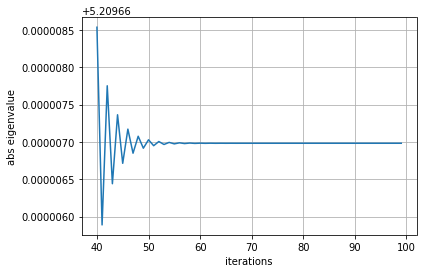

In [12]:
x = np.array([1, 1, 1, 1])

ns = np.arange(40, 100)
pi = []

for n in ns:
    _, l = power_iteration(A, x, n)
    pi.append(l)

plt.xlabel("iterations")
plt.ylabel("abs eigenvalue")
plt.plot(ns, pi)

Using only the power iteration, we see we need $n_{pi} > 55 $ to converge to the eigenvalue. Using a combination of the power iteration AND the rayleigh quotient iteration will save us approximatly 50 iterations.

-------------
# Exercise 3
Let $A$ be a $n × n$ tridiagonal matrix that results (up to an overall constant scaling factor) from an
$n$-point spatial discretization of the Laplace operator in $1$ spatial dimension. Specifically, all diagonal
elements of $A$ have the value $-2$, all elements just below or above the diagonal have value $1$.

$${\displaystyle A = \left( \begin{array}{rrrrr} -2 &  1  &  0 &  0& \ldots \\ 1  & -2 & 1 & 0 &\ldots   \\ 0 & 1 & -2 &  1 &\ldots \\ \vdots & & & & \ddots \end{array} \right) \,}$$



Take $n = 150$. Use `scipy.linalg.qr` to implement Algorithm 4.7 from the book and compute the full eigenvalue spectrum of $A$. Compare against
the eigenvalues obtained by the built-in routine `scipy.linalg.eig(A)`. Show in a figure the (approximate)
eigenvalues after 10, 100 and 500 QR iterations, as well as the eigenvalues obtained with `eig(A)`.


In [13]:
from scipy.sparse import diags
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

n = 150
A = diags([1, -2, 1], [-1, 0, 1], shape=(n, n)).toarray()

In [14]:
def qr_iteration(A, n=10):
    for k in range(1, n):
        q, r = sp.linalg.qr(A)
        A = np.dot(r, q)
    return np.diag(A)

In [15]:
n500 = qr_iteration(A, n=500)
n100 = qr_iteration(A, n=100)
n10 = qr_iteration(A, n=10)

speig = sp.linalg.eig(A)[0]

/usr/lib/python3/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


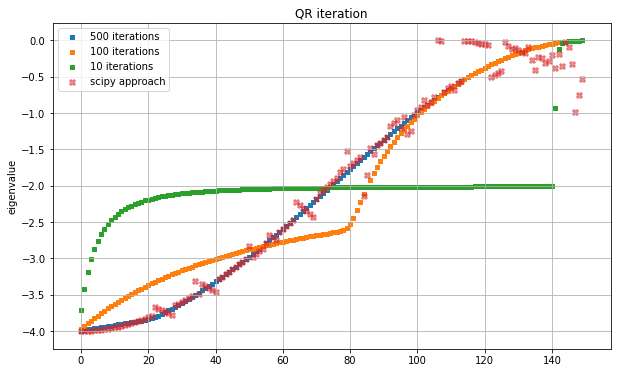

In [57]:
xs = np.arange(0, len(n500))

plt.title("QR iteration")
plt.scatter(xs, n500, s=20, marker=",", label="500 iterations")
plt.scatter(xs, n100, s=20, marker=",", label="100 iterations")
plt.scatter(xs, n10, s=20, marker=",",  label="10 iterations")
plt.scatter(xs, speig, marker="X", label="scipy approach", alpha=0.5)
plt.ylabel("eigenvalue")
plt.legend()

We can see that the eigenvalues are approximated the best by the QR iteration of 500 iterations.